## **Data Preparation**

In [30]:
#loading dataset
import pandas as pd
import numpy as np
#visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#EDA
import os
from collections import Counter
import pandas_profiling as pp
# data preprocessing
from sklearn.preprocessing import LabelEncoder
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [31]:
data = pd.read_excel(r'C:\Users\Stiven Gabriel\Documents\data.xlsx')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,asymptomatic,145,233,1,0,150,0,23,upsloping,0,normal,1
1,37,male,non-anginal pain,130,250,0,1,187,0,35,upsloping,0,fixed defect,1
2,41,female,atypical angina,130,204,0,0,172,0,14,downsloping,0,fixed defect,1
3,56,male,atypical angina,120,236,0,1,178,0,8,downsloping,0,fixed defect,1
4,57,female,typical angina,120,354,0,1,163,1,6,downsloping,0,fixed defect,1


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       303 non-null    int64 
 1   sex       303 non-null    object
 2   cp        303 non-null    object
 3   trestbps  303 non-null    int64 
 4   chol      303 non-null    int64 
 5   fbs       303 non-null    int64 
 6   restecg   303 non-null    int64 
 7   thalach   303 non-null    int64 
 8   exang     303 non-null    int64 
 9   oldpeak   303 non-null    int64 
 10  slope     303 non-null    object
 11  ca        303 non-null    int64 
 12  thal      303 non-null    object
 13  target    303 non-null    int64 
dtypes: int64(10), object(4)
memory usage: 33.3+ KB


## **EDA**

Berikut dilakukan analisis data yang dimulai dari analisis univariat dan multivariat. Sebelum itu, bagi data menjadi dua jenis data, yaitu data kategorik dan data numerik. 

Sebagai catatan, beberapa data kategorik seperti fbs, restecg, exang, dan target sudah diubah menjadi data numerik dengan keterangan setiap value yang berbeda.

In [33]:
categorical_features = ['sex', 'cp', 'slope', 'thal']
numerical_features = ['age', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'ca', 'target']

### Analisis Univariat

a. Data Kategorik

        Jumlah sampel  Persentase
sex                              
male              207        68.3
female             96        31.7


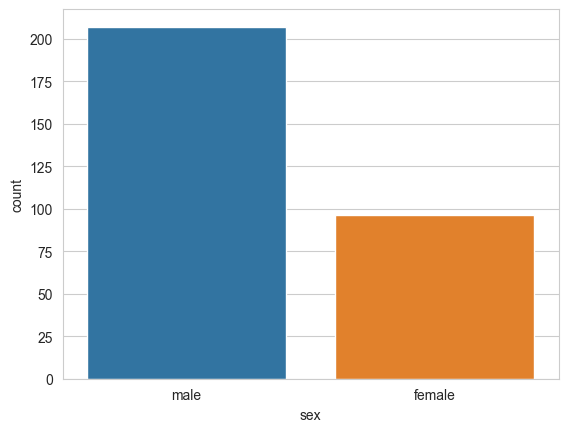

                  Jumlah sampel  Persentase
cp                                         
typical angina              143        47.2
non-anginal pain             87        28.7
atypical angina              50        16.5
asymptomatic                 23         7.6


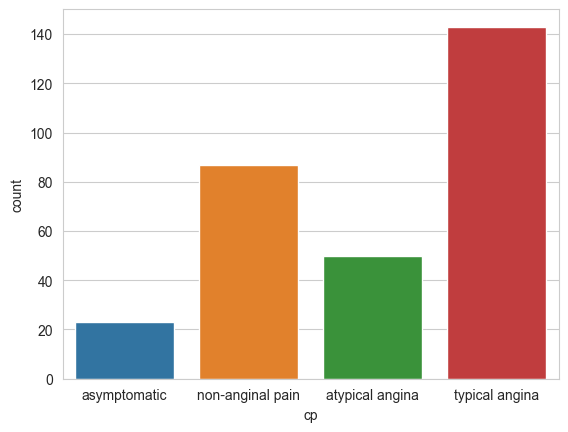

             Jumlah sampel  Persentase
slope                                 
downsloping            142        46.9
flat                   140        46.2
upsloping               21         6.9


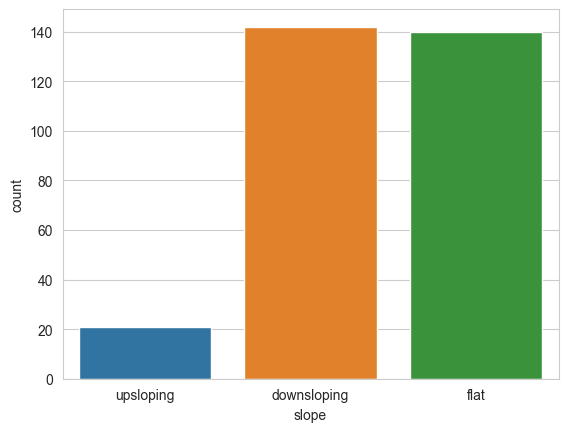

                   Jumlah sampel  Persentase
thal                                        
fixed defect                 166        54.8
reversable defect            117        38.6
normal                        18         5.9
abnormal                       2         0.7


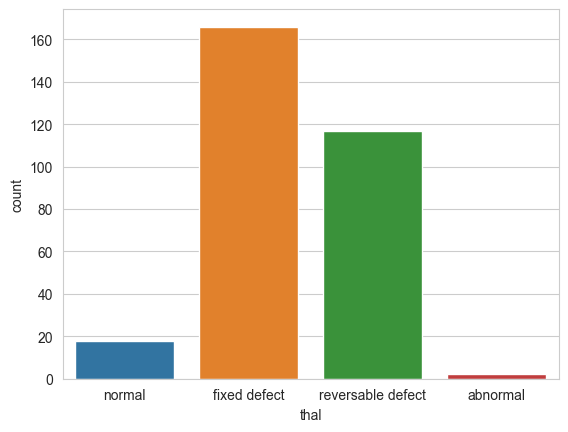

In [34]:
# Looping untuk setiap variabel kategorikal
for feature in categorical_features:
  # Hitung jumlah sampel untuk setiap kategori
  count = data[feature].value_counts()
  # Hitung persentase untuk setiap kategori
  percent = 100 * data[feature].value_counts(normalize=True)
  # Buat DataFrame untuk menyimpan hasil
  df = pd.DataFrame({"Jumlah sampel": count, "Persentase": percent.round(1)})
  # Cetak DataFrame
  print(df.to_string())

  # Plot pie chart untuk setiap variabel
  sns.countplot(x=feature, data=data)
  plt.show()

b. Data Numerik

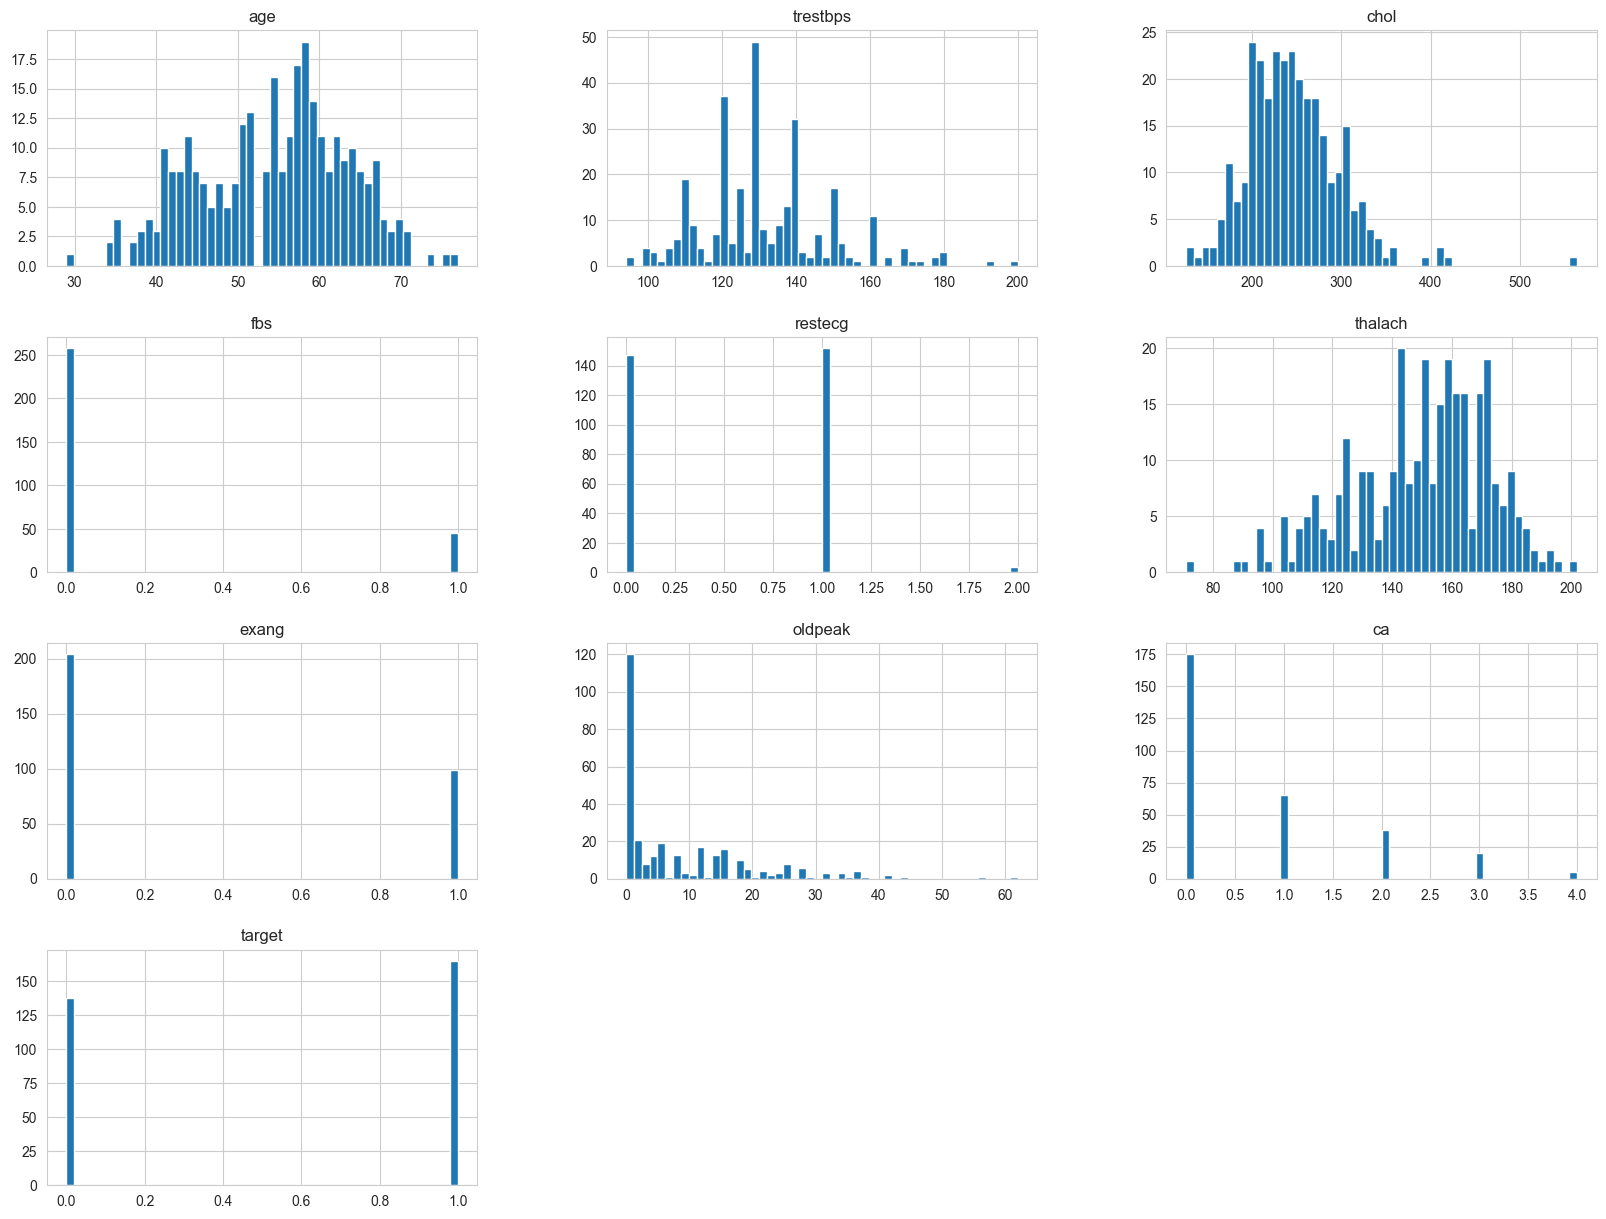

In [35]:
data.hist(bins=50, figsize=(20,15))
plt.show()

### Analisis Multivariat

a. Data Kategorik

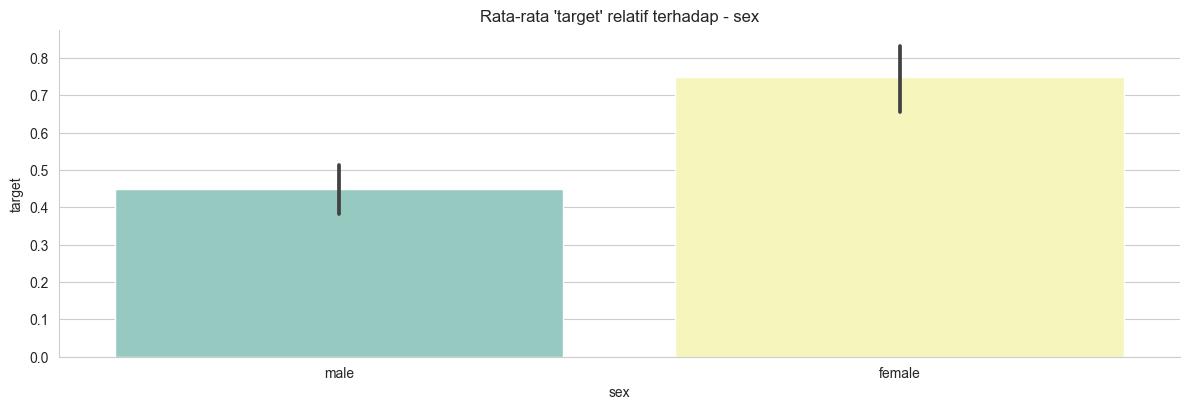

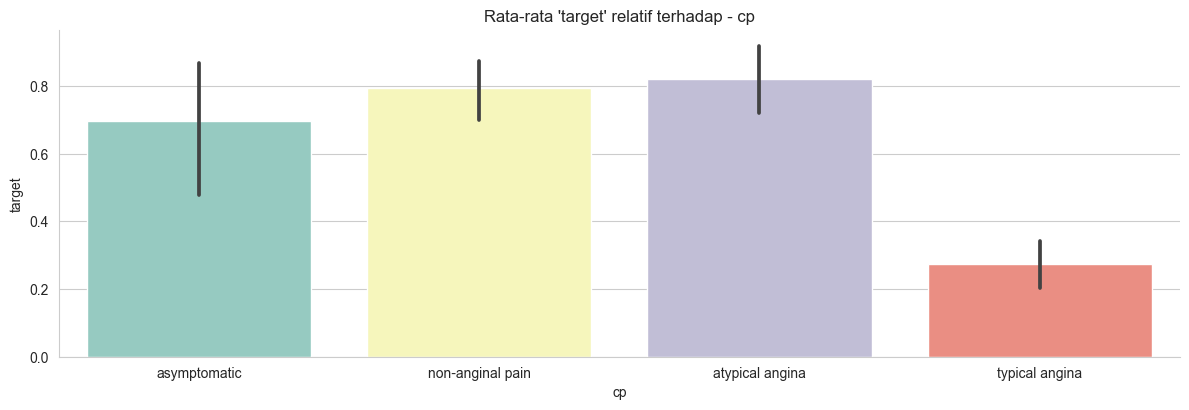

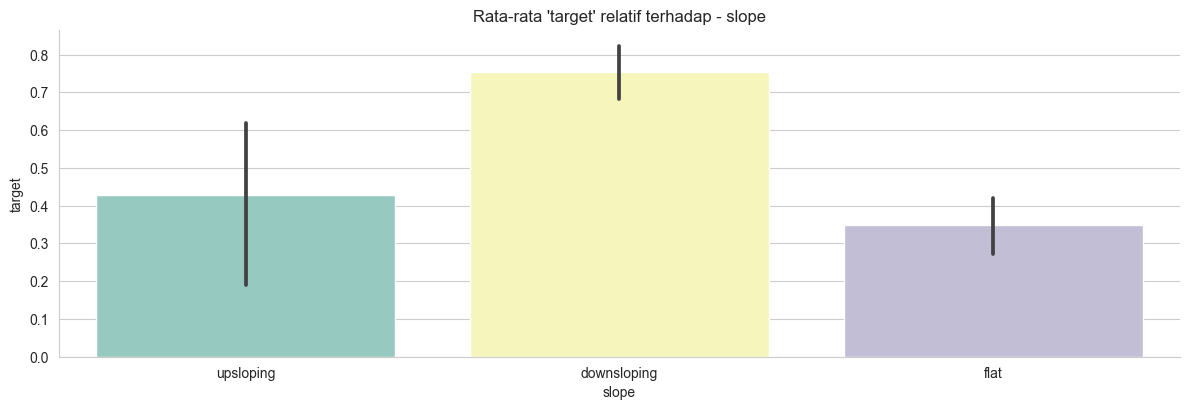

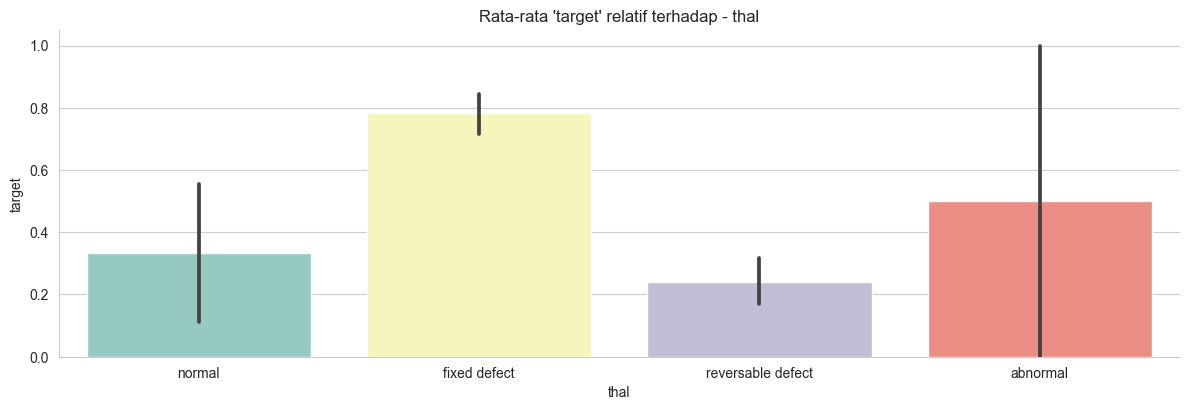

In [36]:
cat_features = data.select_dtypes(include='object').columns.to_list()

for col in cat_features:
  sns.catplot(x=col, y='target', kind="bar", dodge=False, height = 4, aspect = 3,  data=data, palette="Set3")
  plt.title("Rata-rata 'target' relatif terhadap - {}".format(col))

b. Data Numerik

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

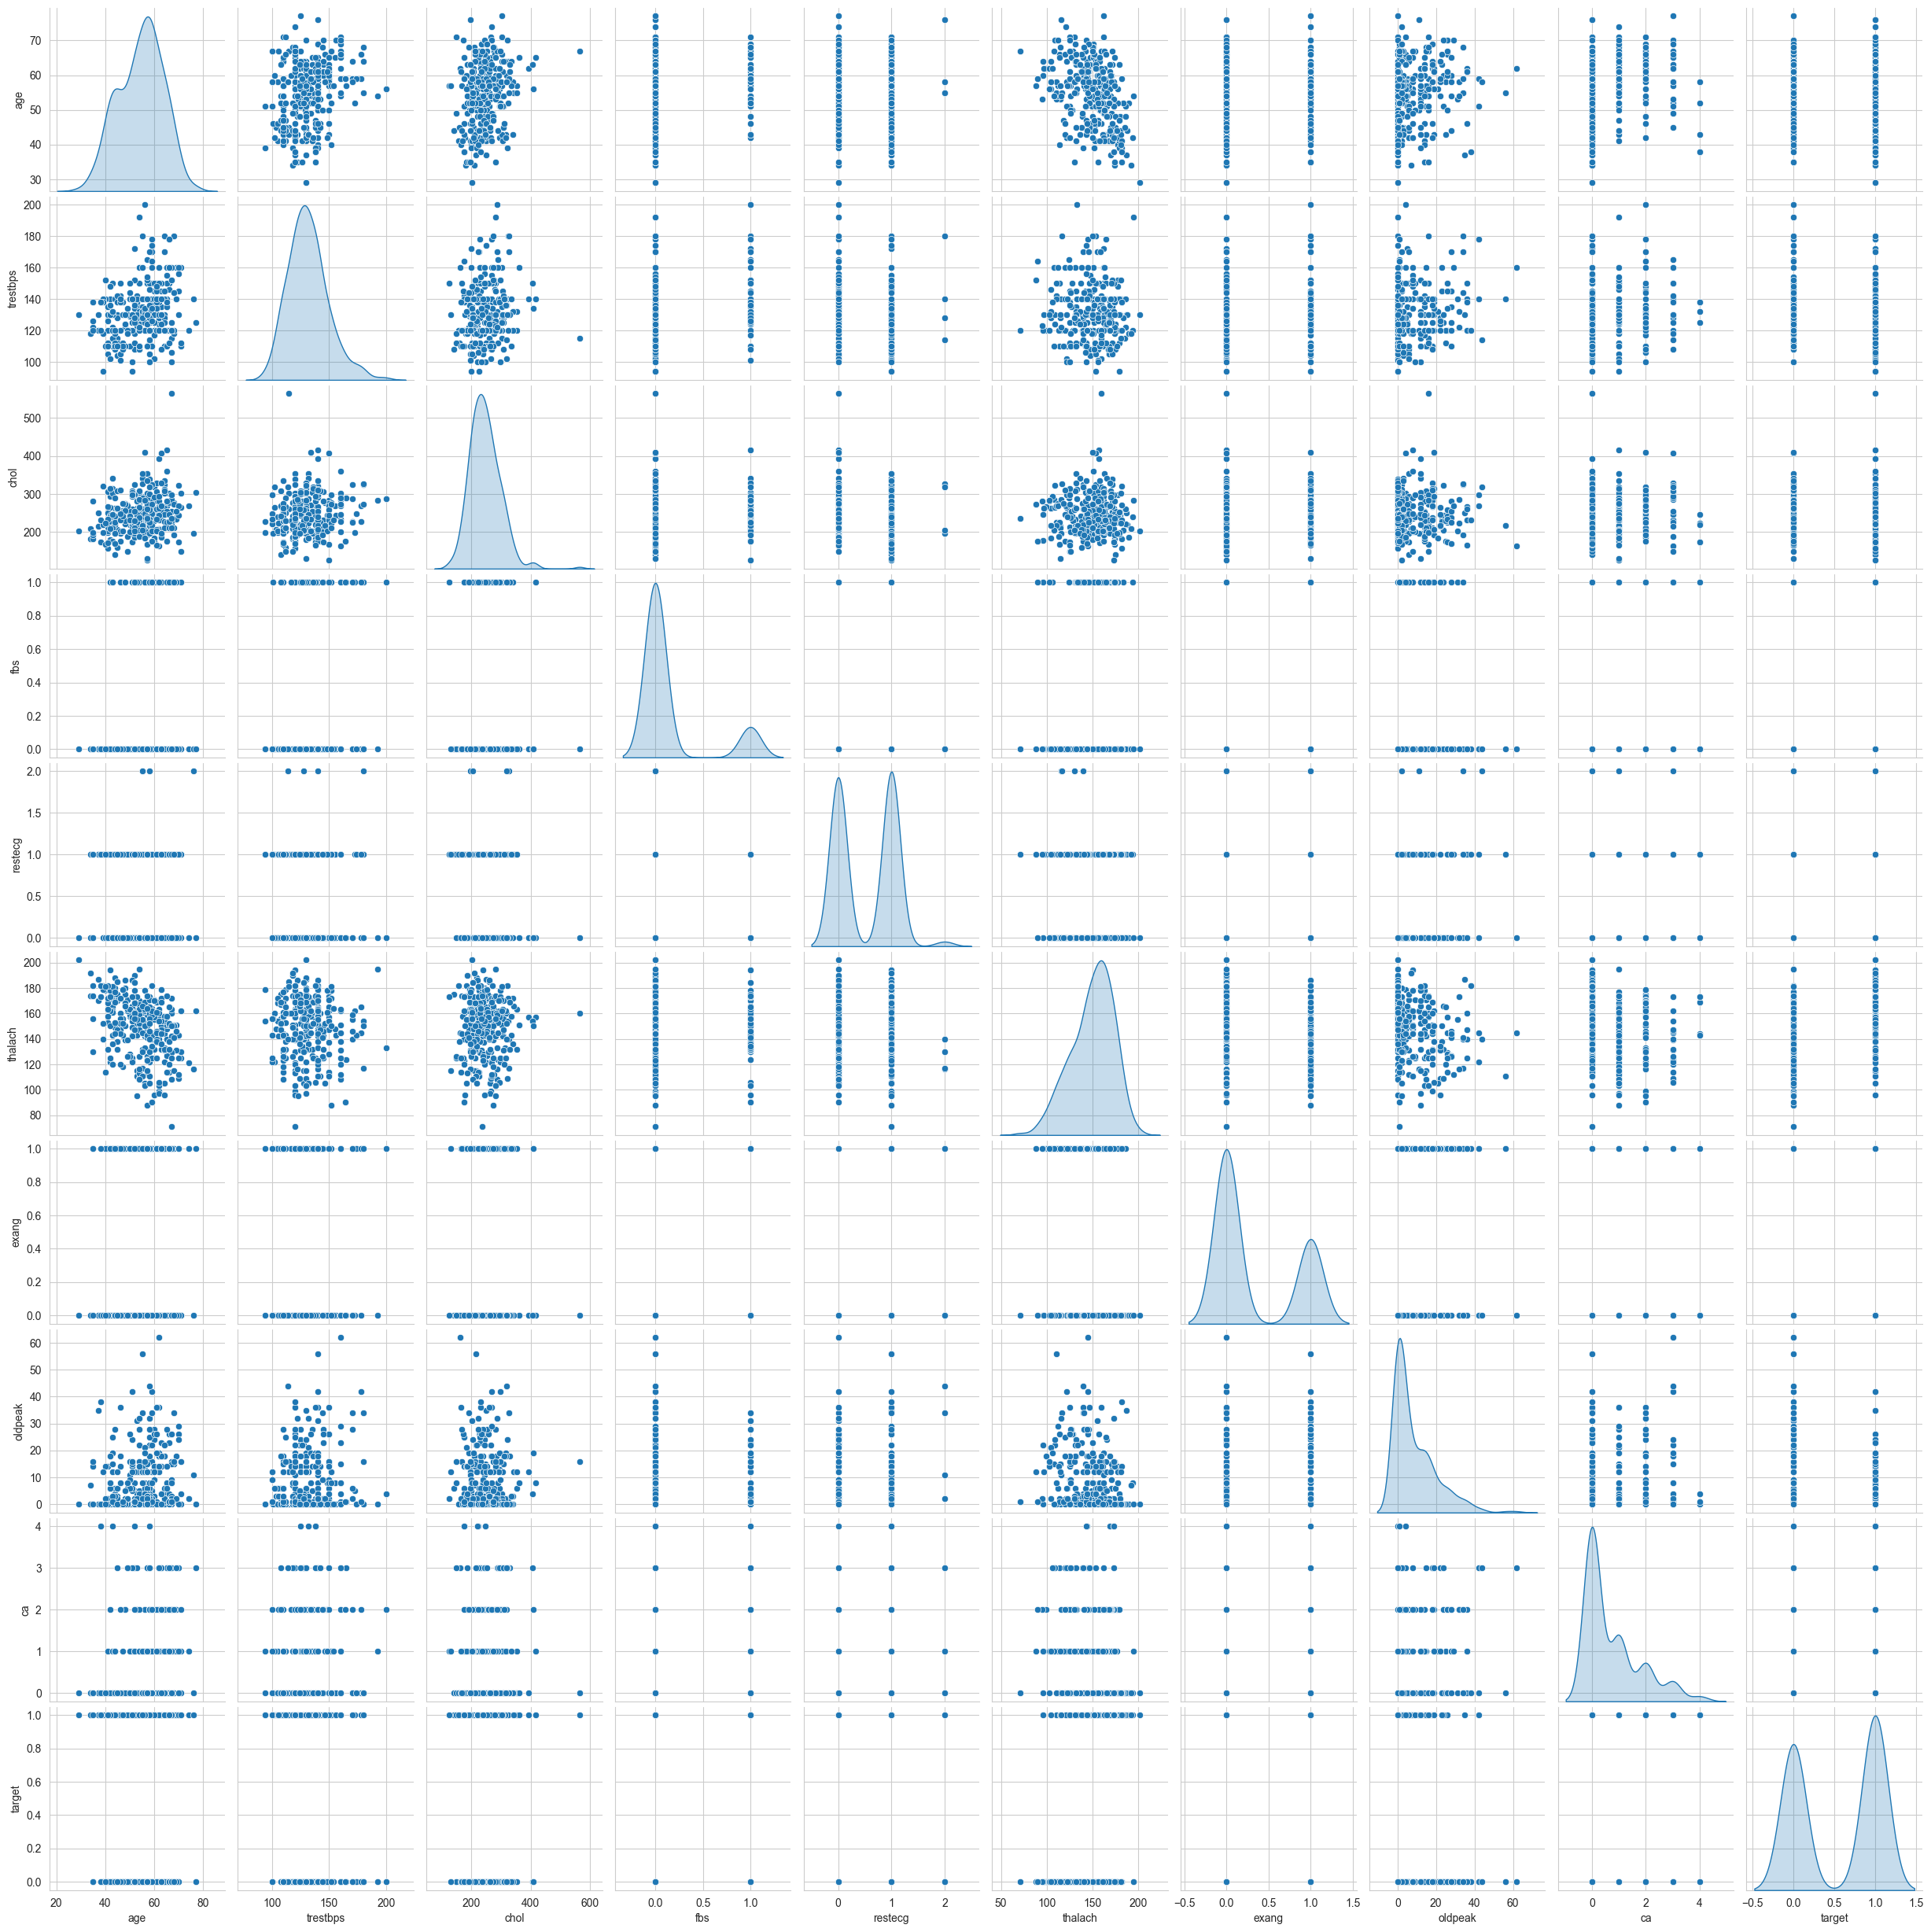

In [37]:
sns.pairplot(data, diag_kind = 'kde')

Setelah itu, dilakukan analisis korelasi dari setiap variabel.

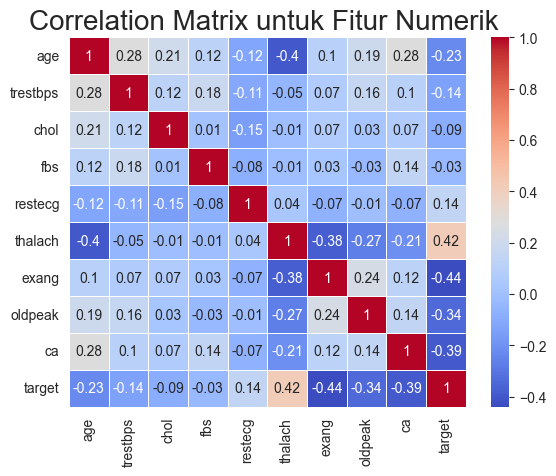

In [38]:
# Buat dataframe baru yang hanya berisi variabel numerik
numerical_variable = data[numerical_features]

# Hitung matriks korelasi untuk dataframe numerik
correlation_matrix = numerical_variable.corr().round(2)

# Plot matriks korelasi
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)
plt.show()

Berdasarkan grafik korelasi diatas dapat dilihat bahwa variabel 'thalach', 'ca' dan 'exang' memiliki korelasi negatif, maka variabel tersebut akan dilakukan Deletion

In [39]:
data.drop(['thalach', 'ca','exang'], inplace=True, axis=1)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,oldpeak,slope,thal,target
0,63,male,asymptomatic,145,233,1,0,23,upsloping,normal,1
1,37,male,non-anginal pain,130,250,0,1,35,upsloping,fixed defect,1
2,41,female,atypical angina,130,204,0,0,14,downsloping,fixed defect,1
3,56,male,atypical angina,120,236,0,1,8,downsloping,fixed defect,1
4,57,female,typical angina,120,354,0,1,6,downsloping,fixed defect,1


## **Model Preparation**

**Dilakukan terlebih dahulu pemisahan kolom 'target' dari dataset untuk merubahnya menjadi variabel y. Setelah itu, dilakukan pemisahan data menjadi set untuk train dan set untuk test**

In [40]:
y = data["target"]
X = data.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

**Sebelum menerapkan algoritma kita harus memeriksa apakah datanya terpecah sama rata atau tidak, karena jika data tidak terpecah rata maka akan menimbulkan masalah ketidakseimbangan data.**

In [41]:
print(y_test.unique())
Counter(y_train)

[0 1]


Counter({1: 131, 0: 111})

Sebelum melakukan scaling, perlu dilakukan encoding pada data kategorikal menjadi data numerikal

In [42]:
from sklearn.preprocessing import OneHotEncoder

# Buat OneHotEncoder
ohe = OneHotEncoder(sparse=False, drop='first')

# Ubah data kategorikal menjadi data numerik
X_train_encoded = ohe.fit_transform(X_train[['sex', 'cp', 'slope', 'thal']])
X_test_encoded = ohe.transform(X_test[['sex', 'cp', 'slope', 'thal']])


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [43]:
from sklearn.preprocessing import StandardScaler

# Buat StandardScaler
scaler = StandardScaler()

# Skalakan data numerik
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)


## **ML models**

Terdapat beberapa algoritma Machine Learning yang berbeda untuk menemukan algoritma yang memprediksi secara akurat.

1. Logistic Regression
2. Naive Bayes
3. Random Forest Classifier
4. Extreme Gradient Boost
5. K-Nearest Neighbour
6. Decision Tree
7. Support Vector Machine


In [44]:
m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train_scaled, y_train)
lr_predict = lr.predict(X_test_scaled)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confussion matrix
[[22  5]
 [ 6 28]]


Accuracy of Logistic Regression: 81.9672131147541 

              precision    recall  f1-score   support

           0       0.79      0.81      0.80        27
           1       0.85      0.82      0.84        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [45]:
m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train_scaled,y_train)
nbpred = nb.predict(X_test_scaled)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))

confussion matrix
[[21  6]
 [ 6 28]]


Accuracy of Naive Bayes model: 80.32786885245902 

              precision    recall  f1-score   support

           0       0.78      0.78      0.78        27
           1       0.82      0.82      0.82        34

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [46]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5)
rf.fit(X_train_scaled,y_train)
rf_predicted = rf.predict(X_test_scaled)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

confussion matrix
[[21  6]
 [ 5 29]]


Accuracy of Random Forest: 81.9672131147541 

              precision    recall  f1-score   support

           0       0.81      0.78      0.79        27
           1       0.83      0.85      0.84        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [47]:
m4 = 'Extreme Gradient Boost'
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train_scaled, y_train)
xgb_predicted = xgb.predict(X_test_scaled)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')
print(classification_report(y_test,xgb_predicted))

confussion matrix
[[ 9 18]
 [ 0 34]]


Accuracy of Extreme Gradient Boost: 70.49180327868852 

              precision    recall  f1-score   support

           0       1.00      0.33      0.50        27
           1       0.65      1.00      0.79        34

    accuracy                           0.70        61
   macro avg       0.83      0.67      0.65        61
weighted avg       0.81      0.70      0.66        61



In [48]:
m5 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_scaled, y_train)
knn_predicted = knn.predict(X_test_scaled)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

confussion matrix
[[24  3]
 [ 9 25]]


Accuracy of K-NeighborsClassifier: 80.32786885245902 

              precision    recall  f1-score   support

           0       0.73      0.89      0.80        27
           1       0.89      0.74      0.81        34

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.82      0.80      0.80        61



In [49]:
m6 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train_scaled, y_train)
dt_predicted = dt.predict(X_test_scaled)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

confussion matrix
[[21  6]
 [ 4 30]]


Accuracy of DecisionTreeClassifier: 83.60655737704919 

              precision    recall  f1-score   support

           0       0.84      0.78      0.81        27
           1       0.83      0.88      0.86        34

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



In [50]:
m7 = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train_scaled, y_train)
svc_predicted = svc.predict(X_test_scaled)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

confussion matrix
[[21  6]
 [ 4 30]]


Accuracy of Support Vector Classifier: 83.60655737704919 

              precision    recall  f1-score   support

           0       0.84      0.78      0.81        27
           1       0.83      0.88      0.86        34

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



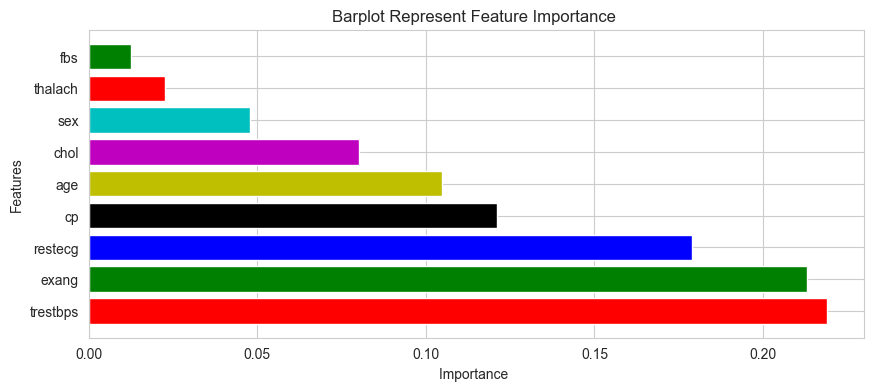

In [55]:
# Assuming xgb.feature_importances_ returns a list or array
feature_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
importance_values = xgb.feature_importances_

# Sort features by importance
sorted_idx = importance_values.argsort()
feature_names = [feature_names[i] for i in sorted_idx[::-1]]
importance_values = [importance_values[i] for i in sorted_idx[::-1]]

# Create the pandas DataFrame
imp_feature = pd.DataFrame({'Feature': feature_names, 'Importance': importance_values})

plt.figure(figsize=(10, 4))
plt.title("Barplot Represent Feature Importance ")
plt.xlabel("Importance ")
plt.ylabel("Features")
my_colors = ['r', 'g', 'b', 'k', 'y', 'm', 'c']

# Ensure both arrays have the same length (important)
plt.barh(imp_feature['Feature'], imp_feature['Importance'], color=my_colors)
plt.show()

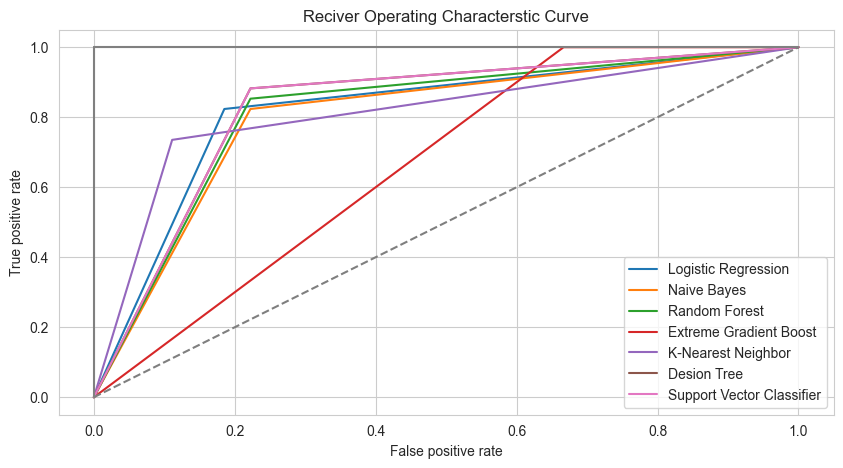

In [56]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_predict)
nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(y_test,nbpred)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,rf_predicted)                                                             
xgb_false_positive_rate,xgb_true_positive_rate,xgb_threshold = roc_curve(y_test,xgb_predicted)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,knn_predicted)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,dt_predicted)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,svc_predicted)


sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Naive Bayes')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(xgb_false_positive_rate,xgb_true_positive_rate,label='Extreme Gradient Boost')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

## **Model Evaluation**

In [57]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest','Extreme Gradient Boost',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine'], 'Accuracy': [lr_acc_score*100,
                    nb_acc_score*100,rf_acc_score*100,xgb_acc_score*100,knn_acc_score*100,dt_acc_score*100,svc_acc_score*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,81.967213
1,Naive Bayes,80.327869
2,Random Forest,81.967213
3,Extreme Gradient Boost,70.491803
4,K-Nearest Neighbour,80.327869
5,Decision Tree,83.606557
6,Support Vector Machine,83.606557


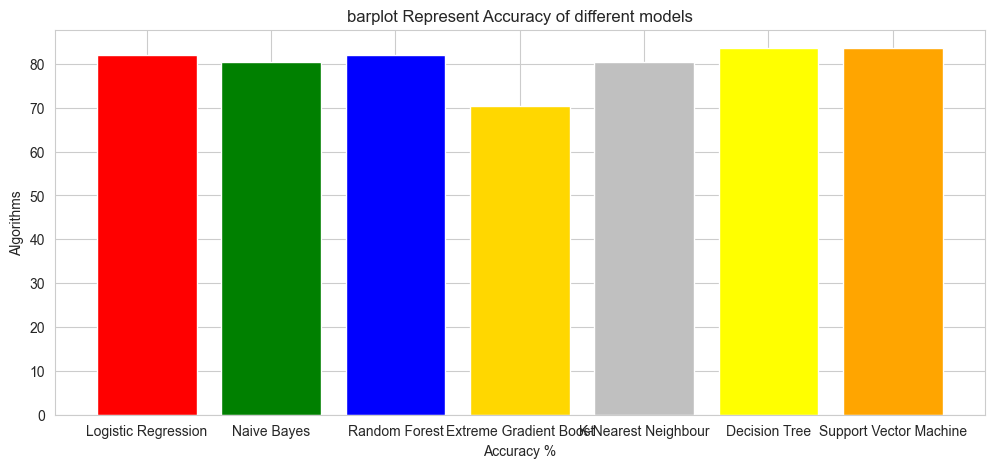

In [58]:
colors = ['red','green','blue','gold','silver','yellow','orange',]
plt.figure(figsize=(12,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

Berdasarkan perolehan tingkat akurasi dan barplot akurasi untuk setiap model diatas menyatakan bahwa model Decision Tree da Support Vector Machine memimiliki tingkat akurasi paling tinggi.